<h1 align='center'>Mini Project 3</h1>

#### Attibute Discription

Data set: Wine Quality Dataset (Source: UCI dataset)

Problem: Cluster the types of wine without knowing quality

<h2>Import libraries</h2>

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

<h2>Reading data and exploration</h2>

In [69]:
rawData = pd.read_csv("..\\Notebooks\\winequality-white.csv")

In [70]:
rawData.head(10)

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
5,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
6,6.2;0.32;0.16;7;0.045;30;136;0.9949;3.18;0.47;...
7,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
8,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
9,8.1;0.22;0.43;1.5;0.044;28;129;0.9938;3.22;0.4...


In [71]:
rawData.shape

(4898, 1)

#### Dealing with format data

In [72]:
strKeys = str(rawData.keys().values[0])
strKeys

'fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'

In [73]:
listKeys = strKeys.replace("\"", "").strip().split(";")
print(listKeys)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [74]:
rawData.size

4898

In [75]:
arrValues = []

for i in range(rawData.size):
    strValues = str(rawData.iloc[i].values[0])
    listValues = strValues.split(";")
    arrValues.append(listValues)

print(arrValues[0:10])

[['7', '0.27', '0.36', '20.7', '0.045', '45', '170', '1.001', '3', '0.45', '8.8', '6'], ['6.3', '0.3', '0.34', '1.6', '0.049', '14', '132', '0.994', '3.3', '0.49', '9.5', '6'], ['8.1', '0.28', '0.4', '6.9', '0.05', '30', '97', '0.9951', '3.26', '0.44', '10.1', '6'], ['7.2', '0.23', '0.32', '8.5', '0.058', '47', '186', '0.9956', '3.19', '0.4', '9.9', '6'], ['7.2', '0.23', '0.32', '8.5', '0.058', '47', '186', '0.9956', '3.19', '0.4', '9.9', '6'], ['8.1', '0.28', '0.4', '6.9', '0.05', '30', '97', '0.9951', '3.26', '0.44', '10.1', '6'], ['6.2', '0.32', '0.16', '7', '0.045', '30', '136', '0.9949', '3.18', '0.47', '9.6', '6'], ['7', '0.27', '0.36', '20.7', '0.045', '45', '170', '1.001', '3', '0.45', '8.8', '6'], ['6.3', '0.3', '0.34', '1.6', '0.049', '14', '132', '0.994', '3.3', '0.49', '9.5', '6'], ['8.1', '0.22', '0.43', '1.5', '0.044', '28', '129', '0.9938', '3.22', '0.45', '11', '6']]


In [76]:
# Create a new dataframe
myData = pd.DataFrame(data=arrValues, columns=listKeys, dtype='float')
myData['quality'] = myData['quality'].astype('int')

In [77]:
myData.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [78]:
myData.shape

(4898, 12)

In [79]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int32  
dtypes: float64(11), int32(1)
memory usage: 440.2 KB


In [80]:
# Remove duplicated values
myData.drop_duplicates(inplace = True)

In [81]:
myData.shape

(3961, 12)

In [82]:
myData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [65]:
myData['quality'].unique()

array(['6', '5', '7', '8', '4', '3', '9'], dtype=object)

<h2>Data preparation</h2>

#### Select dataset X

In [83]:
X = myData.drop('quality', axis=1).values
X[0:10]

array([[7.000e+00, 2.700e-01, 3.600e-01, 2.070e+01, 4.500e-02, 4.500e+01,
        1.700e+02, 1.001e+00, 3.000e+00, 4.500e-01, 8.800e+00],
       [6.300e+00, 3.000e-01, 3.400e-01, 1.600e+00, 4.900e-02, 1.400e+01,
        1.320e+02, 9.940e-01, 3.300e+00, 4.900e-01, 9.500e+00],
       [8.100e+00, 2.800e-01, 4.000e-01, 6.900e+00, 5.000e-02, 3.000e+01,
        9.700e+01, 9.951e-01, 3.260e+00, 4.400e-01, 1.010e+01],
       [7.200e+00, 2.300e-01, 3.200e-01, 8.500e+00, 5.800e-02, 4.700e+01,
        1.860e+02, 9.956e-01, 3.190e+00, 4.000e-01, 9.900e+00],
       [6.200e+00, 3.200e-01, 1.600e-01, 7.000e+00, 4.500e-02, 3.000e+01,
        1.360e+02, 9.949e-01, 3.180e+00, 4.700e-01, 9.600e+00],
       [8.100e+00, 2.200e-01, 4.300e-01, 1.500e+00, 4.400e-02, 2.800e+01,
        1.290e+02, 9.938e-01, 3.220e+00, 4.500e-01, 1.100e+01],
       [8.100e+00, 2.700e-01, 4.100e-01, 1.450e+00, 3.300e-02, 1.100e+01,
        6.300e+01, 9.908e-01, 2.990e+00, 5.600e-01, 1.200e+01],
       [8.600e+00, 2.300e-01, 4.00

#### Normalization

In [86]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:10]

array([[ 0.18535197, -0.10188873,  0.20965146,  3.04157198, -0.03918106,
         0.58757089,  0.76075449,  2.4827482 , -1.28992816, -0.35548818,
        -1.47039574],
       [-0.6222624 ,  0.18817926,  0.04629365, -0.88763435,  0.13398063,
        -1.2139327 , -0.12043311,  0.07247003,  0.68992438, -0.00309159,
        -0.89517431],
       [ 1.45446025, -0.0051994 ,  0.53636707,  0.20266898,  0.17727105,
        -0.28412439, -0.93205327,  0.45122803,  0.42594404, -0.44358733,
        -0.40212736],
       [ 0.41609893, -0.48864605, -0.11706416,  0.53181715,  0.52359442,
         0.70379693,  1.13178085,  0.62339076, -0.03602155, -0.79598393,
        -0.56647635],
       [-0.73763588,  0.38155792, -1.42392663,  0.22324074, -0.03918106,
        -0.28412439, -0.02767652,  0.38236294, -0.10201664, -0.17928989,
        -0.81299982],
       [ 1.45446025, -0.58533538,  0.78140379, -0.90820611, -0.08247148,
        -0.40035043, -0.19000055,  0.00360494,  0.1619637 , -0.35548818,
         0.337

<h2>Choosing the number of clusters</h2>

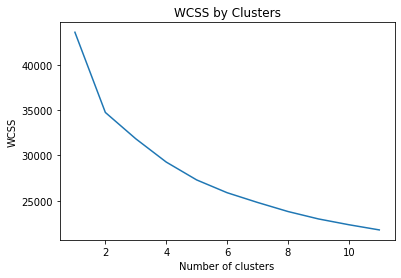

In [87]:
# Choosing number of cluster using Within-Cluster-Sum-of-Squares (WCSS) and Elbow method
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 12), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### ==> Choose the number of clusters is 2

<h2>Modeling</h2>

#### K-means

In [91]:
# Create model
clusterNum = 2
kmeans = KMeans(init='k-means++', n_clusters=clusterNum)
kmeans.fit(X)
labels = kmeans.labels_
labels[0:20]

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [93]:
# Using PCA to transform to 2D data
pca = PCA(n_components=2).fit(X)
features_2d = pca.transform(X)

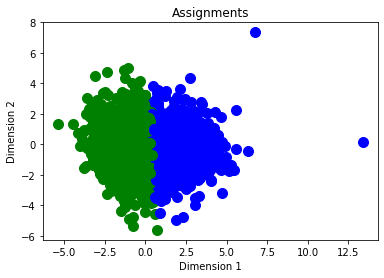

In [94]:
# Plot clusters
def plot_clusters(samples, clusters):
    col_dic = {-1: 'black', 0: 'blue', 1: 'green'}
    colors = [col_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], c=colors[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, labels)

#### DBSCAN

In [98]:
# Create model
db = DBSCAN(eps=2.15, min_samples=9)
db.fit(X)
labelsDB = db.labels_
labelsDB[0:20]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0, -1,  0], dtype=int64)

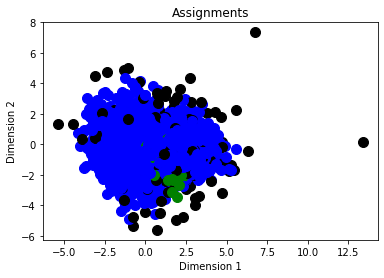

In [100]:
# Plot clusters
plot_clusters(features_2d, labelsDB)

<h2>Conclusion</h2>Choose K-means for clustering